In [37]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [38]:
from google.colab import drive #to import the google drive data

In [39]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
cd /content/drive/"My Drive/Colab Notebooks/Heirarchical-clustering" 

/content/drive/My Drive/Colab Notebooks/Heirarchical-clustering


In [41]:
dataset = pd.read_csv("Mall_Customers.csv")

In [42]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
X = dataset.iloc[:,3:5].values

In [44]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [45]:
X.shape

(200, 2)

In [46]:
import scipy.cluster.hierarchy as sch

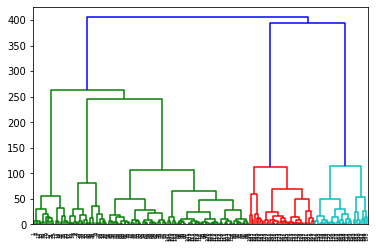

In [47]:
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))

In [48]:

from sklearn.cluster import AgglomerativeClustering

In [49]:
hc =  AgglomerativeClustering(n_clusters=5,linkage='ward')

In [50]:
y_hc = hc.fit_predict(X)

In [51]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

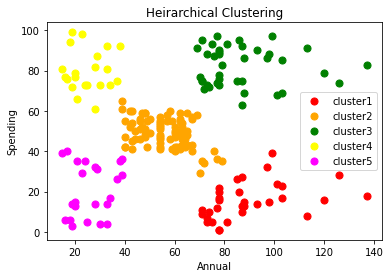

In [54]:
#visualize the Cluster
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=50,c='red',label='cluster1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=50,c='orange',label='cluster2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=50,c='green',label='cluster3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=50,c='yellow',label='cluster4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=50,c='magenta',label='cluster5')
plt.title('Heirarchical Clustering')
plt.xlabel('Annual')
plt.ylabel('Spending')
plt.legend()  

In [55]:
#Verifying with the K Means


In [56]:
from sklearn.cluster import KMeans

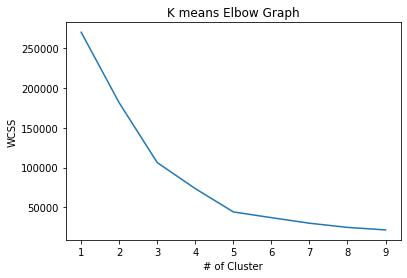

In [57]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(X)

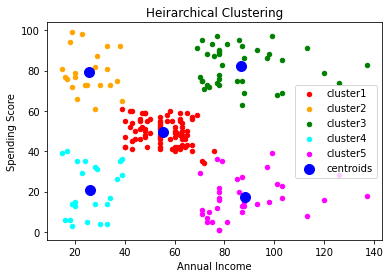

In [59]:
#visualize the Cluster
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=20,c='green',label='cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=20,c='cyan',label='cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=20,c='magenta',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()